In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('funda_train.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train
#installment_term : 일시불 혹은 분할 할부 이야기인듯

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [ ]:
train.describe() #자료를 살펴봄

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [ ]:
train.isnull().sum() # 결측치 찾기

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [ ]:
train_1=train.dropna(axis=0) # 결측치가 있는 열제거 하고 변수에 저장

In [ ]:
train_1.isnull().sum() # 결측치 제거 하고 데이터 확인

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
dtype: int64

In [ ]:
train_2 = train_1[train_1['store_id'] == 272]

In [ ]:
train_2

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
786106,272,525093,b,2016-06-01,10:23,0,경기 부천시,가정용 세탁업,1400.000000
786107,272,525094,a,2016-06-01,13:12,0,경기 부천시,가정용 세탁업,571.428571
786108,272,525095,d,2016-06-01,14:12,0,경기 부천시,가정용 세탁업,571.428571
786109,272,525096,f,2016-06-02,09:56,0,경기 부천시,가정용 세탁업,1657.142857
786110,272,525097,f,2016-06-02,10:22,0,경기 부천시,가정용 세탁업,17685.714286
...,...,...,...,...,...,...,...,...,...
792216,272,529157,f,2019-02-27,17:20,0,경기 부천시,가정용 세탁업,11314.285714
792217,272,529158,a,2019-02-27,17:25,0,경기 부천시,가정용 세탁업,2655.714286
792218,272,529159,a,2019-02-28,13:08,0,경기 부천시,가정용 세탁업,3142.857143
792219,272,529160,b,2019-02-28,16:01,0,경기 부천시,가정용 세탁업,4400.000000


In [ ]:
train_3 = train_2[['transacted_date','amount']] #필요한 열만 남겨 봤다!

In [ ]:
train_3

,transacted_date,amount
786106,2016-06-01,1400.000000
786107,2016-06-01,571.428571
786108,2016-06-01,571.428571
786109,2016-06-02,1657.142857
786110,2016-06-02,17685.714286
...,...,...
792216,2019-02-27,11314.285714
792217,2019-02-27,2655.714286
792218,2019-02-28,3142.857143
792219,2019-02-28,4400.000000


In [ ]:
# company_a = company_a.astype({'transacted_date':'datetime64'})
train_3 = train_3.astype({'transacted_date':'datetime64'}) #프로펫 구동을 위해 데이터 타입을 위해 바꾸다

In [ ]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 786106 to 792220
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transacted_date  6115 non-null   datetime64[ns]
 1   amount           6115 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3 KB


In [ ]:
# company_a.set_index('transacted_date')
train_3.set_index('transacted_date')

,amount
transacted_date,
2016-06-01,1400.000000
2016-06-01,571.428571
2016-06-01,571.428571
2016-06-02,1657.142857
2016-06-02,17685.714286
...,...
2019-02-27,11314.285714
2019-02-27,2655.714286
2019-02-28,3142.857143


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly # 예언자여 도와주쇼!

In [ ]:
train_3['y'] = train_3['amount']
train_3['ds'] = train_3['transacted_date']

In [ ]:
train_3

,transacted_date,amount,y,ds
786106,2016-06-01,1400.000000,1400.000000,2016-06-01
786107,2016-06-01,571.428571,571.428571,2016-06-01
786108,2016-06-01,571.428571,571.428571,2016-06-01
786109,2016-06-02,1657.142857,1657.142857,2016-06-02
786110,2016-06-02,17685.714286,17685.714286,2016-06-02
...,...,...,...,...
792216,2019-02-27,11314.285714,11314.285714,2019-02-27
792217,2019-02-27,2655.714286,2655.714286,2019-02-27
792218,2019-02-28,3142.857143,3142.857143,2019-02-28
792219,2019-02-28,4400.000000,4400.000000,2019-02-28


In [ ]:
m = Prophet()
m.fit(train_3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=60) 
future

,ds
0,2016-06-01
1,2016-06-02
2,2016-06-03
3,2016-06-04
4,2016-06-07
...,...
858,2019-04-25
859,2019-04-26
860,2019-04-27
861,2019-04-28


In [ ]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01,2109.405882,-3820.289051,8771.140306,2109.405882,2109.405882,423.063798,423.063798,423.063798,120.223481,120.223481,120.223481,302.840317,302.840317,302.840317,0.0,0.0,0.0,2532.469681
1,2016-06-02,2111.628955,-3165.553953,8865.506231,2111.628955,2111.628955,636.462465,636.462465,636.462465,333.656925,333.656925,333.656925,302.805540,302.805540,302.805540,0.0,0.0,0.0,2748.091420
2,2016-06-03,2113.852027,-3230.637608,8614.943162,2113.852027,2113.852027,535.790167,535.790167,535.790167,233.907654,233.907654,233.907654,301.882513,301.882513,301.882513,0.0,0.0,0.0,2649.642194
3,2016-06-04,2116.075099,-3309.262770,9101.407525,2116.075099,2116.075099,598.254534,598.254534,598.254534,298.561699,298.561699,298.561699,299.692835,299.692835,299.692835,0.0,0.0,0.0,2714.329634
4,2016-06-07,2122.744316,-2997.070783,9172.157147,2122.744316,2122.744316,765.880494,765.880494,765.880494,483.542021,483.542021,483.542021,282.338473,282.338473,282.338473,0.0,0.0,0.0,2888.624810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2019-04-25,4333.297713,-242.159124,11590.907722,4268.705924,4411.279037,1248.689246,1248.689246,1248.689246,333.656925,333.656925,333.656925,915.032321,915.032321,915.032321,0.0,0.0,0.0,5581.986959
859,2019-04-26,4337.216269,-609.042128,11924.735804,4270.241615,4417.799826,1151.986930,1151.986930,1151.986930,233.907654,233.907654,233.907654,918.079276,918.079276,918.079276,0.0,0.0,0.0,5489.203199
860,2019-04-27,4341.134825,-1034.726349,12093.064296,4271.332515,4424.685460,1217.609230,1217.609230,1217.609230,298.561699,298.561699,298.561699,919.047531,919.047531,919.047531,0.0,0.0,0.0,5558.744055
861,2019-04-28,4345.053381,-2813.130186,9620.256350,4272.647450,4430.790441,-747.024438,-747.024438,-747.024438,-1664.668656,-1664.668656,-1664.668656,917.644218,917.644218,917.644218,0.0,0.0,0.0,3598.028943


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-60:-1]

,ds,yhat,yhat_lower,yhat_upper
803,2019-03-01,4333.246394,-2194.182764,10355.053831
804,2019-03-02,4457.299142,-1148.693026,10268.490272
805,2019-03-03,2554.723805,-3382.123037,8716.655505
806,2019-03-04,4475.753097,-1654.686873,11139.945687
807,2019-03-05,4826.689369,-1589.948526,10953.217281
808,2019-03-06,4525.776381,-1302.717166,10604.574599
809,2019-03-07,4801.487903,-1309.445736,10963.433812
810,2019-03-08,4763.521346,-1751.554659,10286.067638
811,2019-03-09,4889.092215,-1027.491252,10783.380995
812,2019-03-10,2985.543351,-3404.738640,8868.770470


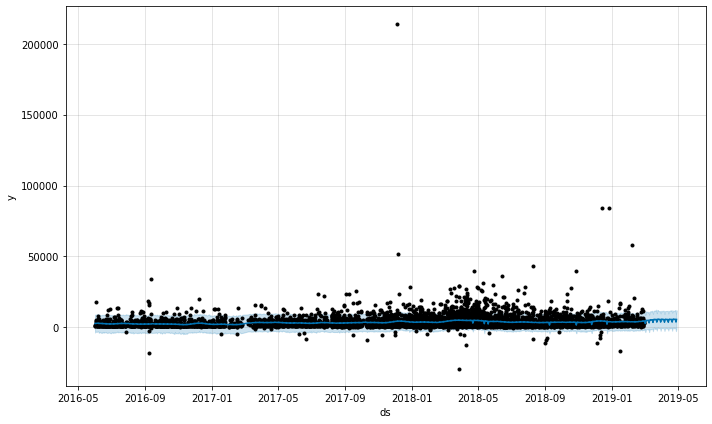

In [ ]:
fig = m.plot(forecast)

In [ ]:
train=train.drop(['store_id', 'card_id','installment_term','region'],axis=1) # 필요한 데이터만 남기고 제거
train.head()

,card_company,transacted_date,transacted_time,type_of_business,amount
0,b,2016-06-01,13:13,기타 미용업,1857.142857
1,h,2016-06-01,18:12,기타 미용업,857.142857
2,c,2016-06-01,18:52,기타 미용업,2000.000000
3,a,2016-06-01,20:22,기타 미용업,7857.142857
4,c,2016-06-02,11:06,기타 미용업,2000.000000


In [ ]:
train = train.sort_values(by=['card_company', 'transacted_date', 'transacted_time'] ,ascending=True)
train #자료를 오름차순으로 정리(안해도 됨)

,card_company,transacted_date,transacted_time,type_of_business,amount
1468641,a,2016-06-01,00:00,NaN,11428.571429
1712884,a,2016-06-01,00:00,NaN,6571.428571
3974480,a,2016-06-01,00:00,NaN,8857.142857
6389627,a,2016-06-01,00:04,노래연습장 운영업,34285.714286
6408481,a,2016-06-01,00:04,NaN,7800.000000
...,...,...,...,...,...
2899048,h,2019-02-28,23:38,NaN,9085.714286
5866431,h,2019-02-28,23:38,NaN,4857.142857
2250412,h,2019-02-28,23:46,NaN,4842.857143
6306521,h,2019-02-28,23:52,NaN,10428.571429


In [ ]:
# 8개 각 카드사별 데이터 정리 매우 많음!(100만 단위임)

In [ ]:
aa = train['card_company'] == 'a'
company_a = train[aa]
company_a

,card_company,transacted_date,transacted_time,type_of_business,amount
1468641,a,2016-06-01,00:00,NaN,11428.571429
1712884,a,2016-06-01,00:00,NaN,6571.428571
3974480,a,2016-06-01,00:00,NaN,8857.142857
6389627,a,2016-06-01,00:04,노래연습장 운영업,34285.714286
6408481,a,2016-06-01,00:04,NaN,7800.000000
...,...,...,...,...,...
4172526,a,2019-02-28,23:56,NaN,6857.142857
1458679,a,2019-02-28,23:57,NaN,10285.714286
1458680,a,2019-02-28,23:57,NaN,-10285.714286
1458681,a,2019-02-28,23:57,NaN,10285.714286


In [ ]:
company_a.dropna(axis=0)

,card_company,transacted_date,transacted_time,type_of_business,amount
6389627,a,2016-06-01,00:04,노래연습장 운영업,34285.714286
738571,a,2016-06-01,00:08,간이음식 포장 판매 전문점,2857.142857
5438573,a,2016-06-01,00:08,여관업,4285.714286
475925,a,2016-06-01,00:13,한식 음식점업,13714.285714
1536830,a,2016-06-01,00:13,간이음식 포장 판매 전문점,1428.571429
...,...,...,...,...,...
945570,a,2019-02-28,23:44,음료 소매업,8571.428571
3550513,a,2019-02-28,23:45,한식 음식점업,8428.571429
3614880,a,2019-02-28,23:54,기타 주점업,5571.428571
4794433,a,2019-02-28,23:55,한식 음식점업,5142.857143


In [ ]:
company_a.info() # 데이터 타입을 보기 위함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828556 entries, 1468641 to 3916924
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   card_company      object 
 1   transacted_date   object 
 2   transacted_time   object 
 3   type_of_business  object 
 4   amount            float64
dtypes: float64(1), object(4)
memory usage: 83.7+ MB


In [ ]:
company_a = company_a.astype({'transacted_date':'datetime64'})

In [ ]:
company_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828556 entries, 1468641 to 3916924
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   card_company      object        
 1   transacted_date   datetime64[ns]
 2   transacted_time   object        
 3   type_of_business  object        
 4   amount            float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 83.7+ MB


In [ ]:
company_a = company_a.drop(['card_company', 'transacted_time', 'type_of_business'],axis=1)
company_a

,transacted_date,amount
1468641,2016-06-01,11428.571429
1712884,2016-06-01,6571.428571
3974480,2016-06-01,8857.142857
6389627,2016-06-01,34285.714286
6408481,2016-06-01,7800.000000
...,...,...
4172526,2019-02-28,6857.142857
1458679,2019-02-28,10285.714286
1458680,2019-02-28,-10285.714286
1458681,2019-02-28,10285.714286


In [ ]:
company_a.set_index('transacted_date')

,amount
transacted_date,
2016-06-01,11428.571429
2016-06-01,6571.428571
2016-06-01,8857.142857
2016-06-01,34285.714286
2016-06-01,7800.000000
...,...
2019-02-28,6857.142857
2019-02-28,10285.714286
2019-02-28,-10285.714286


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
company_a['y'] = company_a['amount']
company_a['ds'] = company_a['transacted_date']

In [ ]:
company_a

,transacted_date,amount,y,ds
1468641,2016-06-01,11428.571429,11428.571429,2016-06-01
1712884,2016-06-01,6571.428571,6571.428571,2016-06-01
3974480,2016-06-01,8857.142857,8857.142857,2016-06-01
6389627,2016-06-01,34285.714286,34285.714286,2016-06-01
6408481,2016-06-01,7800.000000,7800.000000,2016-06-01
...,...,...,...,...
4172526,2019-02-28,6857.142857,6857.142857,2019-02-28
1458679,2019-02-28,10285.714286,10285.714286,2019-02-28
1458680,2019-02-28,-10285.714286,-10285.714286,2019-02-28
1458681,2019-02-28,10285.714286,10285.714286,2019-02-28


In [ ]:
company_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828556 entries, 1468641 to 3916924
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   transacted_date  datetime64[ns]
 1   amount           float64       
 2   y                float64       
 3   ds               int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 69.8 MB


In [ ]:
m = Prophet()
m.fit(company_a)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=60) 
future

,ds
0,2016-06-01
1,2016-06-02
2,2016-06-03
3,2016-06-04
4,2016-06-05
...,...
1058,2019-04-25
1059,2019-04-26
1060,2019-04-27
1061,2019-04-28


In [ ]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01,11254.285709,-26001.634914,48580.839158,11254.285709,11254.285709,329.254351,329.254351,329.254351,748.174574,748.174574,748.174574,-418.920223,-418.920223,-418.920223,0.0,0.0,0.0,11583.540059
1,2016-06-02,11245.984122,-26171.630851,48351.569161,11245.984122,11245.984122,159.880522,159.880522,159.880522,614.804422,614.804422,614.804422,-454.923900,-454.923900,-454.923900,0.0,0.0,0.0,11405.864644
2,2016-06-03,11237.682535,-28245.470035,48909.422395,11237.682535,11237.682535,-291.782686,-291.782686,-291.782686,198.386425,198.386425,198.386425,-490.169111,-490.169111,-490.169111,0.0,0.0,0.0,10945.899849
3,2016-06-04,11229.380948,-28353.643063,43750.332045,11229.380948,11229.380948,-1623.395961,-1623.395961,-1623.395961,-1099.426935,-1099.426935,-1099.426935,-523.969026,-523.969026,-523.969026,0.0,0.0,0.0,9605.984987
4,2016-06-05,11221.079361,-25352.552976,44714.795616,11221.079361,11221.079361,-2555.001404,-2555.001404,-2555.001404,-1999.323081,-1999.323081,-1999.323081,-555.678323,-555.678323,-555.678323,0.0,0.0,0.0,8666.077957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,2019-04-25,10031.748141,-27264.985194,47695.765182,10008.295227,10051.132042,406.299361,406.299361,406.299361,614.804422,614.804422,614.804422,-208.505061,-208.505061,-208.505061,0.0,0.0,0.0,10438.047502
1059,2019-04-26,10033.025136,-27428.696144,48089.088825,10008.927313,10053.177494,-58.913535,-58.913535,-58.913535,198.386425,198.386425,198.386425,-257.299961,-257.299961,-257.299961,0.0,0.0,0.0,9974.111601
1060,2019-04-27,10034.302131,-29859.782724,47290.355446,10009.497071,10055.519624,-1401.786258,-1401.786258,-1401.786258,-1099.426935,-1099.426935,-1099.426935,-302.359323,-302.359323,-302.359323,0.0,0.0,0.0,8632.515873
1061,2019-04-28,10035.579125,-28204.637481,45211.824148,10009.999375,10057.472370,-2342.277067,-2342.277067,-2342.277067,-1999.323081,-1999.323081,-1999.323081,-342.953986,-342.953986,-342.953986,0.0,0.0,0.0,7693.302058


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-60:-1]

,ds,yhat,yhat_lower,yhat_upper
1003,2019-03-01,10799.486592,-27247.742813,47956.049566
1004,2019-03-02,9492.643657,-25499.638017,46657.028974
1005,2019-03-03,8577.905704,-27907.690939,47198.245996
1006,2019-03-04,11256.151237,-24837.187274,47385.727375
1007,2019-03-05,11368.900294,-25752.821332,50699.704894
1008,2019-03-06,11248.345890,-26862.630712,48451.767513
1009,2019-03-07,11079.836660,-26902.588760,46838.079802
1010,2019-03-08,10624.528153,-25584.798094,47978.562644
1011,2019-03-09,9284.802529,-28806.496891,47987.235972
1012,2019-03-10,8340.777978,-27819.586178,45353.716522


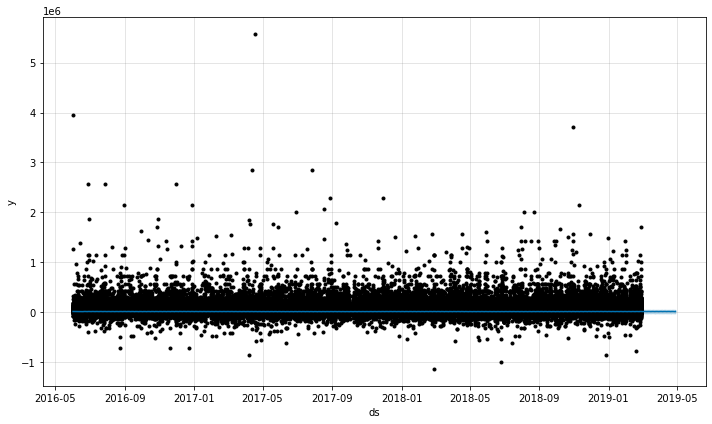

In [ ]:
fig = m.plot(forecast)

In [ ]:
bb = train['card_company'] == 'b'
company_b = train[bb]
company_b

,card_company,transacted_date,transacted_time,type_of_business,amount
1116192,b,2016-06-01,00:00,NaN,77142.857143
4902523,b,2016-06-01,00:00,NaN,7000.000000
1116193,b,2016-06-01,00:01,NaN,13000.000000
1279861,b,2016-06-01,00:01,NaN,4857.142857
3074865,b,2016-06-01,00:03,NaN,12585.714286
...,...,...,...,...,...
4762915,b,2019-02-28,23:52,NaN,7142.857143
1569530,b,2019-02-28,23:55,일식 음식점업,2271.428571
4485531,b,2019-02-28,23:56,NaN,5714.285714
1406927,b,2019-02-28,23:59,NaN,54142.857143


In [ ]:
cc = train['card_company'] == 'c'
company_c = train[cc]
company_c

,card_company,transacted_date,transacted_time,type_of_business,amount
6408480,c,2016-06-01,00:01,NaN,2828.571429
475924,c,2016-06-01,00:03,한식 음식점업,7142.857143
5764566,c,2016-06-01,00:04,일식 음식점업,10857.142857
4566621,c,2016-06-01,00:07,NaN,7142.857143
4572771,c,2016-06-01,00:08,NaN,31428.571429
...,...,...,...,...,...
2844253,c,2019-02-28,23:55,NaN,9157.142857
2923517,c,2019-02-28,23:55,NaN,4714.285714
5995210,c,2019-02-28,23:55,NaN,17142.857143
1727561,c,2019-02-28,23:57,간이음식 포장 판매 전문점,3857.142857


In [ ]:
dd = train['card_company'] == 'd'
company_d = train[dd]
company_d

,card_company,transacted_date,transacted_time,type_of_business,amount
4975111,d,2016-06-01,00:01,NaN,23285.714286
4792636,d,2016-06-01,00:03,한식 음식점업,6142.857143
1976642,d,2016-06-01,00:08,한식 음식점업,4428.571429
5468510,d,2016-06-01,00:16,NaN,7428.571429
1976643,d,2016-06-01,00:18,한식 음식점업,9142.857143
...,...,...,...,...,...
1262478,d,2019-02-28,23:54,NaN,4571.428571
1520479,d,2019-02-28,23:54,NaN,2285.714286
5721474,d,2019-02-28,23:54,서양식 음식점업,2285.714286
6160110,d,2019-02-28,23:54,NaN,5742.857143


In [ ]:
ee = train['card_company'] == 'e'
company_e = train[ee]
company_e

,card_company,transacted_date,transacted_time,type_of_business,amount
5557294,e,2016-06-01,00:18,NaN,4285.714286
3920098,e,2016-06-01,00:24,한식 음식점업,4857.142857
3143641,e,2016-06-01,00:39,NaN,4285.714286
4909717,e,2016-06-01,00:41,NaN,6857.142857
5401772,e,2016-06-01,00:51,NaN,5142.857143
...,...,...,...,...,...
4835120,e,2019-02-28,23:50,노래연습장 운영업,1428.571429
2883468,e,2019-02-28,23:53,NaN,2000.000000
268562,e,2019-02-28,23:57,NaN,8714.285714
1727562,e,2019-02-28,23:58,간이음식 포장 판매 전문점,2571.428571


In [ ]:
ff = train['card_company'] == 'f'
company_f = train[ff]
company_f

,card_company,transacted_date,transacted_time,type_of_business,amount
3314317,f,2016-06-01,00:00,NaN,2428.571429
3006691,f,2016-06-01,00:05,기타 주점업,2514.285714
1819773,f,2016-06-01,00:12,한식 음식점업,6000.000000
3344345,f,2016-06-01,00:18,두발 미용업,3571.428571
3166096,f,2016-06-01,00:26,NaN,2000.000000
...,...,...,...,...,...
2587544,f,2019-02-28,23:52,NaN,3571.428571
4672350,f,2019-02-28,23:57,NaN,10300.000000
5541618,f,2019-02-28,23:58,NaN,4000.000000
5617618,f,2019-02-28,23:58,NaN,14385.714286


In [ ]:
gg = train['card_company'] == 'g'
company_g = train[gg]
company_g

,card_company,transacted_date,transacted_time,type_of_business,amount
2256158,g,2016-06-01,00:01,한식 음식점업,1142.857143
3074866,g,2016-06-01,00:05,NaN,14471.428571
3084455,g,2016-06-01,00:15,NaN,3928.571429
3048413,g,2016-06-01,00:16,NaN,48285.714286
1755034,g,2016-06-01,00:20,NaN,2714.285714
...,...,...,...,...,...
6276898,g,2019-02-28,23:48,한식 음식점업,11000.000000
5599399,g,2019-02-28,23:52,NaN,7071.428571
3308104,g,2019-02-28,23:55,NaN,8542.857143
4556360,g,2019-02-28,23:56,서양식 음식점업,10285.714286


In [ ]:
hh = train['card_company'] == 'h'
company_h = train[hh]
company_h

,card_company,transacted_date,transacted_time,type_of_business,amount
2256159,h,2016-06-01,00:01,한식 음식점업,1100.000000
112504,h,2016-06-01,00:05,NaN,12857.142857
3413820,h,2016-06-01,00:09,NaN,5000.000000
112505,h,2016-06-01,00:14,NaN,3714.285714
5281519,h,2016-06-01,00:40,NaN,4000.000000
...,...,...,...,...,...
2899048,h,2019-02-28,23:38,NaN,9085.714286
5866431,h,2019-02-28,23:38,NaN,4857.142857
2250412,h,2019-02-28,23:46,NaN,4842.857143
6306521,h,2019-02-28,23:52,NaN,10428.571429
